# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [1]:
# Cargar todas las librerías

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from math import factorial
import math as mt
from scipy import stats as st


## Cargar datos

In [3]:
# Carga los archivos de datos en diferentes DataFrames

users = pd.read_csv("megaline_users.csv")
calls = pd.read_csv("megaline_calls.csv")
messages = pd.read_csv("megaline_messages.csv")
internet = pd.read_csv("megaline_internet.csv")
plans = pd.read_csv("megaline_plans.csv")



## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [4]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas

print(plans.head())

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


In [5]:
# Imprime una muestra de los datos para las tarifas

plans.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Por ahora no hay valores ausentes, pero algunas columnas requieren correcciones en el tipo de datos y transformaciones. La columna mb_per_month_included y usd_monthly_pay hay que convertirla a tipo flotante ya que los mb es una variable continua igual que dolares y la columna mb_per_month_included despues pasarla a gb para poder hacer calculos, pero este tipo de cambios los podemos hacer mas adelante.

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [6]:
# Convertimos la columna usd_monthly_pay a flotante con astype()

plans["usd_monthly_pay"] = plans["usd_monthly_pay"].astype("float")
plans.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      float64
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(3), int64(4), object(1)
memory usage: 260.0+ bytes


## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [7]:
# Convertimos la columna mb_per_month_included a flotante con astype()

plans["mb_per_month_included"] = plans["mb_per_month_included"].astype("float")
plans.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      float64
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      float64
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(4), int64(3), object(1)
memory usage: 260.0+ bytes


## Usuarios/as

In [8]:
# Imprime la información general/resumida sobre el DataFrame de usuarios

print(users)
print()
print(users.sample(5))

     user_id first_name   last_name  age  \
0       1000   Anamaria       Bauer   45   
1       1001     Mickey   Wilkerson   28   
2       1002     Carlee     Hoffman   36   
3       1003   Reynaldo     Jenkins   52   
4       1004    Leonila    Thompson   40   
..       ...        ...         ...  ...   
495     1495      Fidel      Sharpe   67   
496     1496      Ariel    Shepherd   49   
497     1497      Donte     Barrera   49   
498     1498       Scot  Williamson   51   
499     1499      Shena     Dickson   37   

                                          city    reg_date      plan  \
0        Atlanta-Sandy Springs-Roswell, GA MSA  2018-12-24  ultimate   
1              Seattle-Tacoma-Bellevue, WA MSA  2018-08-13      surf   
2         Las Vegas-Henderson-Paradise, NV MSA  2018-10-21      surf   
3                                Tulsa, OK MSA  2018-01-28      surf   
4              Seattle-Tacoma-Bellevue, WA MSA  2018-05-23      surf   
..                                     

In [9]:
# Imprime una muestra de datos para usuarios

print(users.head())
print()
users.info()


   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null   

[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Aqui tenemos valores ausentes en la columna churn_date, en este caso podemos reemplazar los valores ausentes con un nombre unico. Los nombres y las ciudades tienen combinaciones de Mayusculas y Minisculas, en este caso deberiamos tener todos las variables categoricas en Minisculas o Mayusculas para que todo el dataset sea uniforme. Aqui podemos hacer que todas los nombres y las ciudades esten en Minisculas para conservar uniformidad en el dataframe y sea mas facil identificarlos.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [10]:
# Comprobamos si hay valores ausentes

print(users.isna().sum())

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64


In [11]:
# Comprobamos duplicados

print(users.duplicated().sum())

0


In [12]:
# Rectificamos cantidad de valores ausentes.

print(users["churn_date"].value_counts(dropna=False))

churn_date
NaN           466
2018-12-18      3
2018-12-31      2
2018-11-14      2
2018-12-19      2
2018-12-15      1
2018-11-18      1
2018-09-17      1
2018-12-10      1
2018-08-19      1
2018-11-21      1
2018-09-01      1
2018-12-26      1
2018-08-16      1
2018-10-22      1
2018-10-03      1
2018-10-13      1
2018-07-31      1
2018-11-30      1
2018-12-22      1
2018-11-29      1
2018-12-27      1
2018-12-12      1
2018-11-11      1
2018-11-24      1
2018-10-07      1
2018-12-30      1
2018-09-07      1
2018-11-16      1
2018-09-18      1
Name: count, dtype: int64


In [13]:
# Decidi reemplazar los valores ausentes por active, esto significa para identificar que los usuarios 
# estan todavia activos, usamos fillna()

users["churn_date"] = users["churn_date"].fillna("active")
print(users["churn_date"].value_counts(dropna=False))

churn_date
active        466
2018-12-18      3
2018-12-31      2
2018-11-14      2
2018-12-19      2
2018-12-15      1
2018-11-18      1
2018-09-17      1
2018-12-10      1
2018-08-19      1
2018-11-21      1
2018-09-01      1
2018-12-26      1
2018-08-16      1
2018-10-22      1
2018-10-03      1
2018-10-13      1
2018-07-31      1
2018-11-30      1
2018-12-22      1
2018-11-29      1
2018-12-27      1
2018-12-12      1
2018-11-11      1
2018-11-24      1
2018-10-07      1
2018-12-30      1
2018-09-07      1
2018-11-16      1
2018-09-18      1
Name: count, dtype: int64


In [14]:
# Mostramos el dataframe

users.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [15]:
# Pasamos todo a minisculas 

users["first_name"] = users["first_name"].str.lower()
users["last_name"] = users["last_name"].str.lower()
users["city"] = users["city"].str.lower()
print(users[["first_name","last_name","city"]].head())

  first_name  last_name                                   city
0   anamaria      bauer  atlanta-sandy springs-roswell, ga msa
1     mickey  wilkerson        seattle-tacoma-bellevue, wa msa
2     carlee    hoffman   las vegas-henderson-paradise, nv msa
3   reynaldo    jenkins                          tulsa, ok msa
4    leonila   thompson        seattle-tacoma-bellevue, wa msa


In [16]:
# Pasamos las fechas a datetime 

users["reg_date"] = pd.to_datetime(users["reg_date"])
print(users["reg_date"].head())

0   2018-12-24
1   2018-08-13
2   2018-10-21
3   2018-01-28
4   2018-05-23
Name: reg_date, dtype: datetime64[ns]


In [19]:
users.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  500 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


## Llamadas

In [20]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas

print(calls)
print()
print(calls.sample(5))

              id  user_id   call_date  duration
0        1000_93     1000  2018-12-27      8.52
1       1000_145     1000  2018-12-27     13.66
2       1000_247     1000  2018-12-27     14.48
3       1000_309     1000  2018-12-28      5.76
4       1000_380     1000  2018-12-30      4.22
...          ...      ...         ...       ...
137730  1499_199     1499  2018-11-21      8.72
137731  1499_200     1499  2018-10-20     10.89
137732  1499_201     1499  2018-09-21      8.12
137733  1499_202     1499  2018-10-10      0.37
137734  1499_203     1499  2018-12-29     13.86

[137735 rows x 4 columns]

              id  user_id   call_date  duration
43892   1159_488     1159  2018-10-18      4.93
22093    1082_21     1082  2018-11-26     11.26
34890   1132_199     1132  2018-04-20      4.88
115815   1406_41     1406  2018-05-16      0.00
48257   1174_234     1174  2018-06-01      6.18


In [21]:
# Imprime una muestra de datos para las llamadas

print(calls.head())
print()
calls.info()

         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

En este caso tenemos que pasar la columna call_date al formato datetime en caso de que la necesitamos para filtrar o hacer calculos con ella mas adelante.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [22]:
print(calls.isna().sum())

id           0
user_id      0
call_date    0
duration     0
dtype: int64


In [23]:
print(calls.duplicated().sum())

0


In [24]:
print(calls["id"].unique())
print(calls["id"].sample(5))

['1000_93' '1000_145' '1000_247' ... '1499_201' '1499_202' '1499_203']
29145    1110_196
79995     1287_44
29105    1110_156
85426    1313_406
76239    1270_125
Name: id, dtype: object


In [25]:
pd.get_option("display.precision")

6

In [26]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [27]:
# Pasamos las fechas a datetime

calls["call_date"] = pd.to_datetime(calls["call_date"])
print(calls["call_date"].head())

0   2018-12-27
1   2018-12-27
2   2018-12-27
3   2018-12-28
4   2018-12-30
Name: call_date, dtype: datetime64[ns]


In [28]:
calls.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


## Mensajes

In [29]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes

print(messages)
print()
print(messages.sample(5))


             id  user_id message_date
0      1000_125     1000   2018-12-27
1      1000_160     1000   2018-12-31
2      1000_223     1000   2018-12-31
3      1000_251     1000   2018-12-27
4      1000_255     1000   2018-12-26
...         ...      ...          ...
76046  1497_526     1497   2018-12-24
76047  1497_536     1497   2018-12-24
76048  1497_547     1497   2018-12-31
76049  1497_558     1497   2018-12-24
76050  1497_613     1497   2018-12-23

[76051 rows x 3 columns]

             id  user_id message_date
48603  1326_140     1326   2018-07-15
9607   1069_920     1069   2018-11-21
67364  1435_402     1435   2018-12-26
9049   1066_222     1066   2018-05-09
37362  1247_526     1247   2018-10-02


In [30]:
# Imprime una muestra de datos para los mensajes

print(messages.head())
print()
messages.info()


         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Aqui tenemos que convertir las fechas de la columna message_date a datetime en caso de necesitar esta informacion para hacer calculos mas adelante.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [31]:
print(messages.isna().sum())

id              0
user_id         0
message_date    0
dtype: int64


In [32]:
print(messages.duplicated().sum())

0


In [33]:
print(messages["user_id"].unique())

[1000 1001 1002 1003 1004 1005 1006 1007 1008 1011 1013 1014 1015 1016
 1017 1018 1019 1020 1023 1026 1027 1028 1029 1030 1031 1032 1033 1034
 1035 1036 1037 1038 1039 1043 1044 1045 1046 1047 1051 1052 1053 1054
 1055 1056 1057 1058 1059 1060 1061 1062 1064 1065 1066 1067 1069 1070
 1072 1075 1076 1077 1078 1079 1080 1081 1082 1083 1084 1086 1087 1088
 1089 1090 1091 1092 1093 1094 1095 1096 1098 1099 1100 1101 1102 1103
 1104 1105 1107 1110 1111 1112 1113 1114 1115 1116 1118 1119 1120 1121
 1122 1123 1124 1125 1126 1127 1128 1130 1131 1132 1133 1134 1136 1137
 1138 1139 1140 1141 1142 1144 1145 1146 1147 1148 1151 1154 1155 1159
 1160 1161 1162 1163 1164 1165 1167 1168 1169 1170 1172 1173 1174 1175
 1176 1177 1178 1179 1180 1181 1182 1183 1184 1186 1187 1188 1189 1190
 1191 1192 1193 1194 1195 1196 1197 1198 1199 1200 1201 1203 1204 1205
 1206 1207 1209 1211 1212 1213 1214 1215 1218 1219 1220 1221 1222 1223
 1224 1227 1228 1229 1230 1231 1232 1234 1235 1236 1237 1240 1241 1242
 1243 

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [34]:
# Pasamos las fechas a datetime

messages["message_date"] = pd.to_datetime(messages["message_date"])
print(messages["message_date"].head())

0   2018-12-27
1   2018-12-31
2   2018-12-31
3   2018-12-27
4   2018-12-26
Name: message_date, dtype: datetime64[ns]


In [35]:
messages.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


## Internet

In [36]:
# Imprime la información general/resumida sobre el DataFrame de internet

print(internet)
print()
print(internet.sample())


              id  user_id session_date  mb_used
0        1000_13     1000   2018-12-29    89.86
1       1000_204     1000   2018-12-31     0.00
2       1000_379     1000   2018-12-28   660.40
3       1000_413     1000   2018-12-26   270.99
4       1000_442     1000   2018-12-27   880.22
...          ...      ...          ...      ...
104820  1499_215     1499   2018-10-20   218.06
104821  1499_216     1499   2018-12-30   304.72
104822  1499_217     1499   2018-09-22   292.75
104823  1499_218     1499   2018-12-07     0.00
104824  1499_219     1499   2018-12-24   758.31

[104825 rows x 4 columns]

             id  user_id session_date  mb_used
40206  1181_387     1181   2018-10-22   481.37


In [37]:
# Imprime una muestra de datos para el tráfico de internet

print(internet.head())
print()
internet.info()

         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

No hay valores ausentes, tenemos que pasar la columna session_date a datetime en caso de necesitarla para hacer calculos mas adelante.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [38]:
internet["session_date"] = pd.to_datetime(internet["session_date"])
print(internet["session_date"].head())

0   2018-12-29
1   2018-12-31
2   2018-12-28
3   2018-12-26
4   2018-12-27
Name: session_date, dtype: datetime64[ns]


In [39]:
internet.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [44]:
internet["mb_used"].describe()

count    104825.000000
mean        366.713701
std         277.170542
min           0.000000
25%         136.080000
50%         343.980000
75%         554.610000
max        1693.470000
Name: mb_used, dtype: float64

In [45]:
print("Valor maximo de mb_used:", internet["mb_used"].max())

Valor maximo de mb_used: 1693.47


In [46]:
print("Valor minimo de mb_used:", internet["mb_used"].min())

Valor minimo de mb_used: 0.0


## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [47]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras

print(plans)
print()
plans.info(show_counts=True)


   messages_included  mb_per_month_included  minutes_included  \
0                 50                15360.0               500   
1               1000                30720.0              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0             20.0          10             0.03            0.03      surf  
1             70.0           7             0.01            0.01  ultimate  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      float64
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      float64
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   pl

## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [48]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.

# Creamos una nueva columna llamada month extrayendo el mes especifo de la columna call_date 
# redondeamos la columna duration al entero siguiente con np.ceil

calls["month"] = calls["call_date"].dt.month 
calls["duration"] = np.ceil(calls["duration"])
print(calls.sample(10))


              id  user_id  call_date  duration  month
125916  1445_331     1445 2018-07-19       4.0      7
128679   1462_92     1462 2018-12-01       9.0     12
26580   1100_137     1100 2018-08-13       4.0      8
55770   1199_478     1199 2018-10-14       0.0     10
54448   1196_333     1196 2018-08-27      14.0      8
55232   1197_219     1197 2018-12-05       0.0     12
126301  1447_166     1447 2018-11-22      16.0     11
132094   1476_13     1476 2018-12-11       4.0     12
83133    1301_47     1301 2018-12-21      12.0     12
88892   1324_952     1324 2018-10-29      12.0     10


In [51]:
# Para agrupar los datos de interes podemos usar groupby()

monthly_calls = calls.groupby(["month","user_id"])["id"].count()
print(monthly_calls)

month  user_id
1      1042       18
       1077       42
       1185       23
       1196       42
       1214        5
                  ..
12     1495       65
       1496       40
       1497       54
       1498       39
       1499       65
Name: id, Length: 2258, dtype: int64


<div class="alert alert-block alert-warning">

Si bien es correcta la forma de agrupar para sacar la duración de las llamadas por cada ususario, para proximas ocasiones puedes hacer uso de la siguiente forma:
    
    pivot_calls = calls.pivot_table(index=['user_id', 'month'],
                                values=['duration'],
                                aggfunc=['sum','count']).reset_index()

</div>

In [52]:
monthly_calls = calls.groupby("month")["user_id"].count()
print(monthly_calls)

month
1       172
2       774
3      1620
4      3442
5      5959
6      8221
7     11105
8     13590
9     16523
10    21064
11    24651
12    30614
Name: user_id, dtype: int64


In [53]:
pivot_monthly_calls = calls.pivot_table(index="user_id",
                                        columns="month",
                                        values="id",
                                        aggfunc="count"
                                       )

pivot_monthly_calls.fillna(0,inplace=True)

print(pivot_monthly_calls)
print()
print(pivot_monthly_calls.sum())

month     1     2     3     4     5     6     7     8     9     10    11  \
user_id                                                                    
1000     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1001     0.0   0.0   0.0   0.0   0.0   0.0   0.0  27.0  49.0  65.0  64.0   
1002     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  11.0  55.0   
1003     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1004     0.0   0.0   0.0   0.0  21.0  44.0  49.0  49.0  42.0  61.0  54.0   
...      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
1495     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  52.0  75.0  61.0   
1496     0.0   0.0   0.0   0.0   0.0   0.0   0.0  18.0  52.0  46.0  39.0   
1497     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1498     0.0  37.0  37.0  47.0  35.0  37.0  43.0  44.0  45.0  46.0  41.0   
1499     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  41.0  53.0  45.0   

month      

In [54]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.

# Usamos groupby() y le aplicamos sum()

duration_monthly = calls.groupby(["month","user_id"])["duration"].sum()

print(duration_monthly)


month  user_id
1      1042       114.0
       1077       290.0
       1185       181.0
       1196       287.0
       1214        16.0
                  ...  
12     1495       492.0
       1496       294.0
       1497       300.0
       1498       339.0
       1499       496.0
Name: duration, Length: 2258, dtype: float64


In [55]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.

# Creamos una columna nueva llamada month extrayendo el mes de la fecha.

messages["month"] = messages["message_date"].dt.month
print(messages.sample(10))




             id  user_id message_date  month
15221  1101_278     1101   2018-10-06     10
71527  1466_179     1466   2018-05-19      5
17139  1113_242     1113   2018-10-02     10
31214   1195_81     1195   2018-12-08     12
66199  1433_139     1433   2018-10-09     10
70286  1456_254     1456   2018-09-01      9
65648   1422_53     1422   2018-12-23     12
8130   1061_136     1061   2018-11-30     11
47238  1320_482     1320   2018-12-17     12
29474  1181_140     1181   2018-04-26      4


In [56]:
# Agrupamos con groupby()

monthly_messages = messages.groupby(["month","user_id"])["id"].count()
print(monthly_messages)

month  user_id
1      1077       37
       1196       23
       1214        2
       1362       21
2      1028       12
                  ..
12     1491       43
       1492       37
       1494       33
       1496       11
       1497       50
Name: id, Length: 1806, dtype: int64


In [57]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.

internet["month"] = internet["session_date"].dt.month
print(internet.sample(10))



              id  user_id session_date  mb_used  month
100616  1476_130     1476   2018-12-27   122.40     12
71723   1334_291     1334   2018-10-05   585.28     10
45269   1201_131     1201   2018-11-20   671.54     11
97519    1460_53     1460   2018-10-10   727.82     10
7050    1039_325     1039   2018-09-25   445.42      9
50718   1226_199     1226   2018-11-14   406.05     11
102475  1490_290     1490   2018-08-19   177.20      8
63670   1292_374     1292   2018-08-03   285.55      8
98826   1466_307     1466   2018-07-18     0.00      7
48985    1219_95     1219   2018-12-12    34.59     12


In [58]:
# 1gb = 1024mb
# Pasamos de mb a gb dividiendo entre 1024

monthly_mb = internet.groupby(["month","user_id"])["mb_used"].sum()
monthly_mb = np.ceil(monthly_mb/1024)
print(monthly_mb)

month  user_id
1      1042        2.0
       1077       11.0
       1185        7.0
       1196        9.0
       1214        2.0
                  ... 
12     1495       24.0
       1496       17.0
       1497       11.0
       1498       23.0
       1499       22.0
Name: mb_used, Length: 2277, dtype: float64


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [59]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month

# Usamos concat() para fusionar los datos.

data_merge = pd.concat([duration_monthly,monthly_messages,monthly_mb],axis="columns")
data_merge = data_merge.fillna(0).reset_index()
print(data_merge)
data_merge.info(show_counts=True)


      month  user_id  duration    id  mb_used
0         1     1042     114.0   0.0      2.0
1         1     1077     290.0  37.0     11.0
2         1     1185     181.0   0.0      7.0
3         1     1196     287.0  23.0      9.0
4         1     1214      16.0   2.0      2.0
...     ...      ...       ...   ...      ...
2288     12     1194       0.0  56.0     31.0
2289     12     1204       0.0  78.0     36.0
2290     12     1349       0.0  61.0     13.0
2291      6     1311       0.0   0.0      2.0
2292     12     1108       0.0   0.0      1.0

[2293 rows x 5 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   month     2293 non-null   int32  
 1   user_id   2293 non-null   int64  
 2   duration  2293 non-null   float64
 3   id        2293 non-null   float64
 4   mb_used   2293 non-null   float64
dtypes: float64(3), int32(1), int64(1)
memor

In [60]:
# Añade la información de la tarifa

print(plans)

   messages_included  mb_per_month_included  minutes_included  \
0                 50                15360.0               500   
1               1000                30720.0              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0             20.0          10             0.03            0.03      surf  
1             70.0           7             0.01            0.01  ultimate  


In [61]:
# Finalmente para fusionar todos los datos en una sola tabla usamos merge() 
# tomando como referencia la columna user_id

plans_calls = data_merge.merge(users[["user_id","city","plan"]], on="user_id").merge(plans,left_on="plan",right_on="plan_name")

print(plans_calls)



      month  user_id  duration    id  mb_used  \
0         1     1042     114.0   0.0      2.0   
1         1     1077     290.0  37.0     11.0   
2         1     1185     181.0   0.0      7.0   
3         1     1196     287.0  23.0      9.0   
4         1     1214      16.0   2.0      2.0   
...     ...      ...       ...   ...      ...   
2288     12     1194       0.0  56.0     31.0   
2289     12     1204       0.0  78.0     36.0   
2290     12     1349       0.0  61.0     13.0   
2291      6     1311       0.0   0.0      2.0   
2292     12     1108       0.0   0.0      1.0   

                                                 city      plan  \
0     philadelphia-camden-wilmington, pa-nj-de-md msa      surf   
1               charlotte-concord-gastonia, nc-sc msa  ultimate   
2              louisville/jefferson county, ky-in msa  ultimate   
3              los angeles-long beach-anaheim, ca msa  ultimate   
4              san francisco-oakland-berkeley, ca msa  ultimate   
...      

In [62]:
# Removemos la columna plan_name ya que esta repetida con drop()
# Pasamos la columna mb_per_month_included a gb
# Usamos rename() para renombrar las columnas y tener todo en las mismas unidades.

plans_calls.drop("plan_name", axis="columns",inplace=True)

plans_calls["mb_per_month_included"] = np.ceil(plans_calls["mb_per_month_included"] / 1024)

plans_calls = plans_calls.rename(columns={"duration":"minutes","id":"messages","mb_used":"gb_used","mb_per_month_included":"gb_per_month_included"})

print(plans_calls)





      month  user_id  minutes  messages  gb_used  \
0         1     1042    114.0       0.0      2.0   
1         1     1077    290.0      37.0     11.0   
2         1     1185    181.0       0.0      7.0   
3         1     1196    287.0      23.0      9.0   
4         1     1214     16.0       2.0      2.0   
...     ...      ...      ...       ...      ...   
2288     12     1194      0.0      56.0     31.0   
2289     12     1204      0.0      78.0     36.0   
2290     12     1349      0.0      61.0     13.0   
2291      6     1311      0.0       0.0      2.0   
2292     12     1108      0.0       0.0      1.0   

                                                 city      plan  \
0     philadelphia-camden-wilmington, pa-nj-de-md msa      surf   
1               charlotte-concord-gastonia, nc-sc msa  ultimate   
2              louisville/jefferson county, ky-in msa  ultimate   
3              los angeles-long beach-anaheim, ca msa  ultimate   
4              san francisco-oakland-ber

In [63]:
plans_calls.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   month                  2293 non-null   int32  
 1   user_id                2293 non-null   int64  
 2   minutes                2293 non-null   float64
 3   messages               2293 non-null   float64
 4   gb_used                2293 non-null   float64
 5   city                   2293 non-null   object 
 6   plan                   2293 non-null   object 
 7   messages_included      2293 non-null   int64  
 8   gb_per_month_included  2293 non-null   float64
 9   minutes_included       2293 non-null   int64  
 10  usd_monthly_pay        2293 non-null   float64
 11  usd_per_gb             2293 non-null   int64  
 12  usd_per_message        2293 non-null   float64
 13  usd_per_minute         2293 non-null   float64
dtypes: float64(7), int32(1), int64(4), object(2)
memory usag

[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [64]:
# Calcula el ingreso mensual para cada usuario

# Aqui podemos crear una funcion para calcular el ingreso mensual para cada usuario en funcion de cada fila
# Despues usamos apply() para crear una nueva columna con los resultados llamada revenue

def revenue(row):
    minutes = row["minutes"]
    messages = row["messages"]
    gb_used = row["gb_used"]
    messages_included = row["messages_included"]
    gb_per_month_included = row["gb_per_month_included"]
    minutes_included = row["minutes_included"]
    usd_monthly_pay = row["usd_monthly_pay"]
    usd_per_gb = row["usd_per_gb"]
    usd_per_message = row["usd_per_message"]
    usd_per_minute = row["usd_per_minute"]
    usd_monthly_pay = row["usd_monthly_pay"]


    messages_revenue = (messages - messages_included)* (usd_per_message)
    minutes_revenue = (minutes - minutes_included)* (usd_per_minute)
    gb_revenue = (gb_used - gb_per_month_included)* (usd_per_gb)

    revenue_pay = usd_monthly_pay + messages_revenue + minutes_revenue + gb_revenue

    if (messages_included < messages) and (minutes_included < minutes) and (gb_per_month_included < gb_used):
        return revenue_pay
    if (messages_included < messages) and (minutes_included < minutes):
        return usd_monthly_pay + messages_revenue + minutes_revenue
    if (messages_included < messages) and (gb_per_month_included < gb_used):
        return usd_monthly_pay + messages_revenue+ gb_revenue
    if (minutes_included < minutes) and (gb_per_month_included < gb_used):
        return usd_monthly_pay + minutes_revenue + gb_revenue
    if messages_included < messages:
        return usd_monthly_pay + messages_revenue 
    if minutes_included < minutes:
        return usd_monthly_pay + minutes_revenue
    if gb_per_month_included < gb_used:
        return usd_monthly_pay + gb_revenue
    else:
        return usd_monthly_pay    

plans_calls["revenue"] = plans_calls.apply(revenue, axis=1)

print(plans_calls.sample(10))
                
                
                



      month  user_id  minutes  messages  gb_used  \
1186     10     1188    344.0      43.0     21.0   
1575     11     1235    336.0      33.0     13.0   
1836     12     1043    228.0      87.0     38.0   
496       7     1335    454.0      99.0     19.0   
229       5     1491    429.0      45.0      7.0   
103       4     1312    288.0      38.0     28.0   
2122     12     1354    544.0      44.0     19.0   
2246     12     1488    721.0       0.0     20.0   
1384     10     1488    740.0       0.0     23.0   
2215     12     1452     36.0       4.0      1.0   

                                             city      plan  \
1186                             richmond, va msa  ultimate   
1575  minneapolis-st. paul-bloomington, mn-wi msa      surf   
1836    new york-newark-jersey city, ny-nj-pa msa  ultimate   
496           dallas-fort worth-arlington, tx msa      surf   
229                 grand rapids-kentwood, mi msa      surf   
103                                fresno, ca msa

## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

In [65]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

minutes_mean = plans_calls.pivot_table(index="month",columns="plan",values="minutes",aggfunc="mean")

print(minutes_mean)


plan         surf    ultimate
month                        
1      203.000000  193.500000
2      297.000000  403.142857
3      330.000000  304.250000
4      351.540000  336.857143
5      399.584416  406.241379
6      431.298969  370.957447
7      449.983471  427.067797
8      410.111111  421.436620
9      414.226804  437.511628
10     429.729958  450.735849
11     423.325088  445.196850
12     473.836478  459.099338


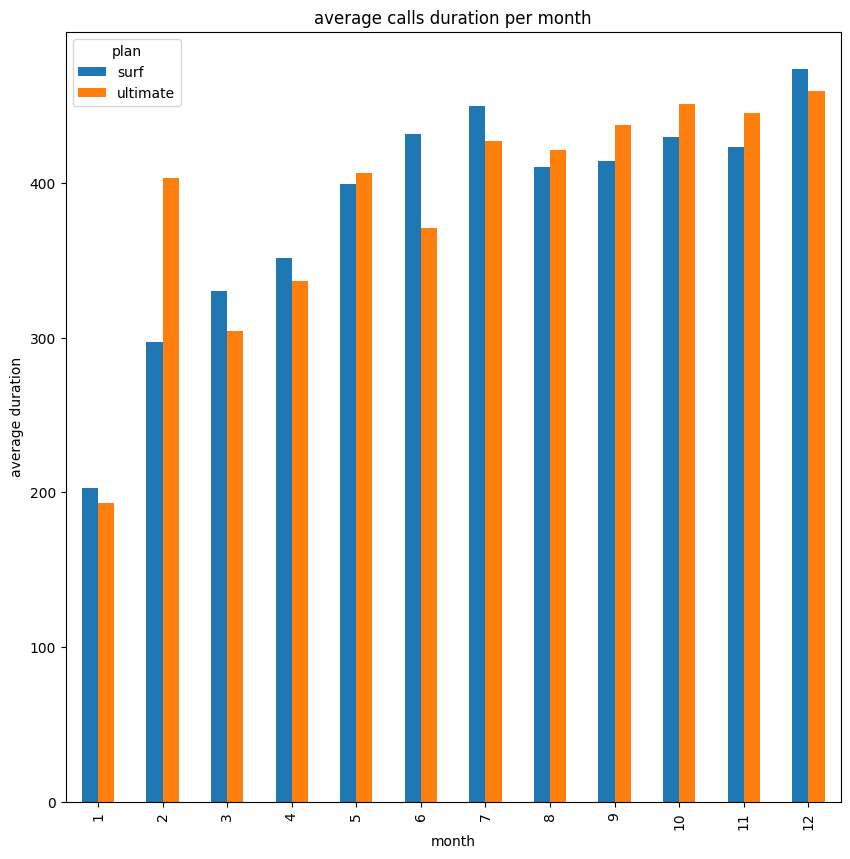

In [66]:
minutes_mean.plot(kind="bar", title="average calls duration per month", ylabel="average duration", figsize=(10,10))
plt.show()

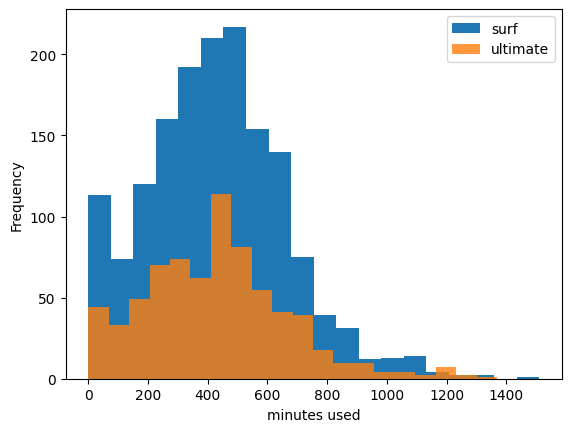

In [67]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

plans_calls[plans_calls["plan"]=="surf"]["minutes"].plot(kind="hist",bins=20)
plans_calls[plans_calls["plan"]=="ultimate"]["minutes"].plot(kind="hist",bins=20,alpha=0.8)
plt.xlabel("minutes used")
plt.legend(["surf","ultimate"])
plt.show()


[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [68]:
# Calcula la media y la varianza de la duración mensual de llamadas.

duration_mean = plans_calls["minutes"].mean()
variance = np.var(plans_calls["minutes"])
standard_deviation = np.sqrt(variance)
duration_median = plans_calls["minutes"].median()

print(f"La media es igual a: {duration_mean}")
print(f"La varianza es igual a: {variance}")
print(f"La desviacion estandar es igual a: {standard_deviation}")
print(f"La mediana es igual a: {duration_median}")


La media es igual a: 429.2834714348016
La varianza es igual a: 55822.82326365781
La desviacion estandar es igual a: 236.26854057122756
La mediana es igual a: 425.0


<Axes: ylabel='minutes'>

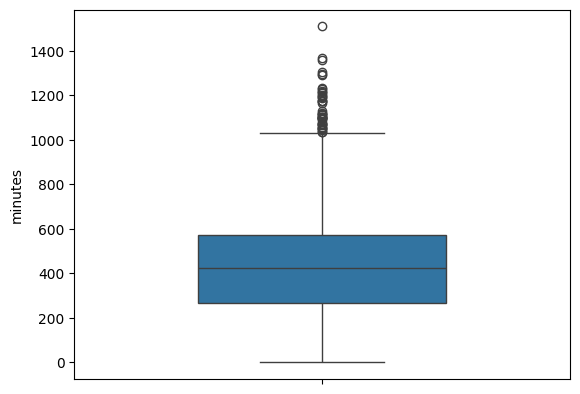

In [69]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

sns.boxplot(data=plans_calls["minutes"], width=.5)


<Axes: xlabel='month', ylabel='minutes'>

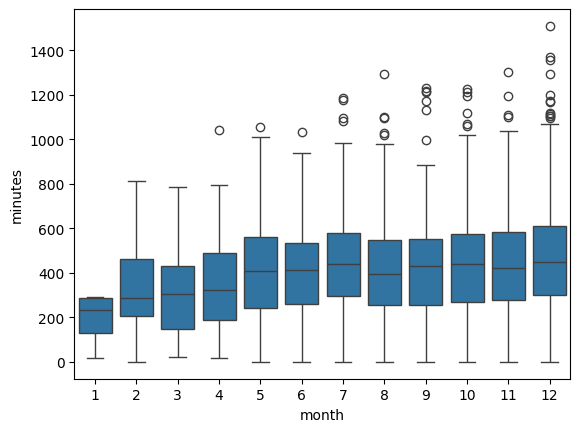

In [70]:
sns.boxplot(data=plans_calls, x="month", y="minutes")

In [71]:
print(plans_calls["minutes"].describe())

count    2293.000000
mean      429.283471
std       236.320077
min         0.000000
25%       265.000000
50%       425.000000
75%       572.000000
max      1510.000000
Name: minutes, dtype: float64


In [72]:
Q1 = 265
Q2 = 425
Q3 = 572

IQR = Q3-Q1  # Intervalo intercuartilico

print("valores atipicos son numeros mayores a:", Q3 + 1.5*IQR)
print("valores atipicos son numeros menores a:", Q1 - 1.5*IQR)





valores atipicos son numeros mayores a: 1032.5
valores atipicos son numeros menores a: -195.5


[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

La duracion de las llamadas varia segun el plan, la cantidad de minutos usados es mayor en el plan surf en comparacion con el ultimate. Las personas gastan mas minutos llamando cuando usan el plan surf.

### Mensajes

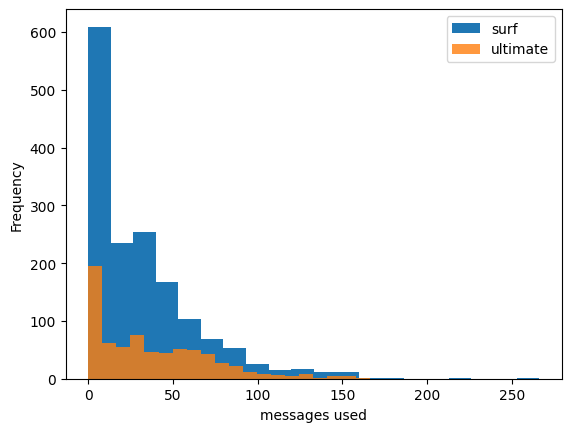

In [73]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

plans_calls[plans_calls["plan"]=="surf"]["messages"].plot(kind="hist",bins=20)
plans_calls[plans_calls["plan"]=="ultimate"]["messages"].plot(kind="hist",bins=20,alpha=0.8)
plt.xlabel("messages used")
plt.legend(["surf","ultimate"])
plt.show()


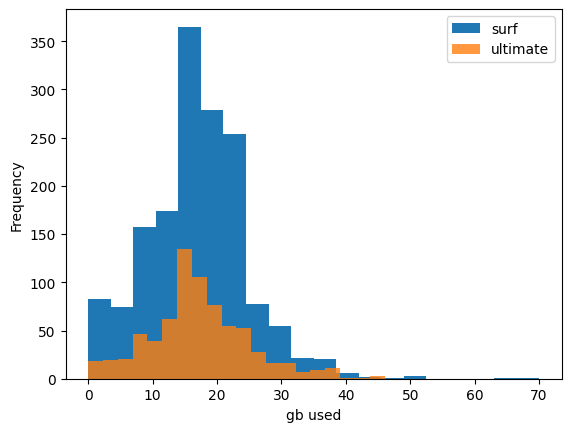

In [74]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

plans_calls[plans_calls["plan"]=="surf"]["gb_used"].plot(kind="hist",bins=20)
plans_calls[plans_calls["plan"]=="ultimate"]["gb_used"].plot(kind="hist",bins=20,alpha=0.8)
plt.xlabel("gb used")
plt.legend(["surf","ultimate"])
plt.show()

In [75]:
print(plans_calls[plans_calls["plan"]=="surf"]["gb_used"].describe())

count    1573.000000
mean       16.670693
std         7.847522
min         0.000000
25%        12.000000
50%        17.000000
75%        21.000000
max        70.000000
Name: gb_used, dtype: float64


In [76]:
print(plans_calls[plans_calls["plan"]=="ultimate"]["gb_used"].describe())

count    720.000000
mean      17.306944
std        7.670108
min        0.000000
25%       13.000000
50%       17.000000
75%       21.000000
max       46.000000
Name: gb_used, dtype: float64


[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

Sin importar el tipo de plan, las personas tienden a enviar de 0 a 10 mensajes con mas frecuencia. La cantidad de mensajes o el mayor flujo de mensajes es para el plan surf. El plan surf prensenta mayor numero de mensajes por usuario.

### Internet

In [77]:
# Usamos una tabla dinamica para filtrar y agrupar los valores que necesitamos. 
# Aqui podemos usar pivot_table()

internet_trafic = plans_calls.pivot_table(index="month",columns="plan",values="gb_used",aggfunc="sum")
print(internet_trafic)

plan     surf  ultimate
month                  
1        10.0      29.0
2       110.0     121.0
3       312.0     221.0
4       611.0     343.0
5      1087.0     489.0
6      1502.0     725.0
7      2042.0     973.0
8      2735.0    1267.0
9      3238.0    1463.0
10     4126.0    1878.0
11     4650.0    2174.0
12     5800.0    2778.0


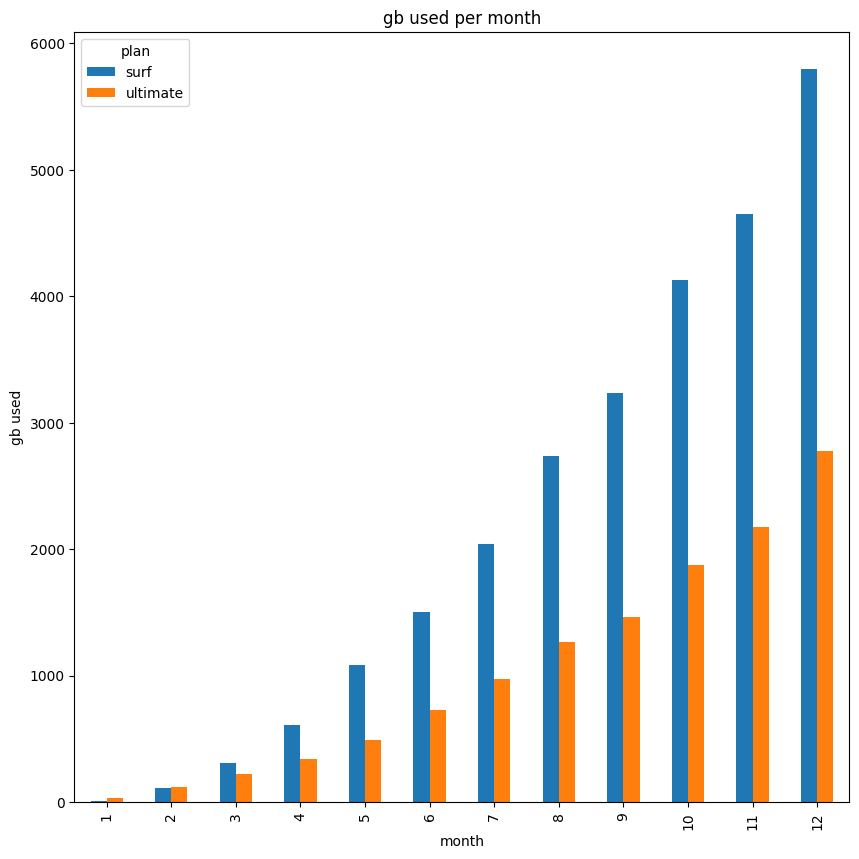

In [78]:

internet_trafic.plot(kind="bar", title="gb used per month", ylabel="gb used", figsize=(10,10))
plt.show()

In [80]:
print(internet_trafic.corr()) # matriz de correlacion

plan          surf  ultimate
plan                        
surf      1.000000  0.998901
ultimate  0.998901  1.000000


[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

El consumo de internet varia segun el tipo de plan, sim importar el mes vamos que el mayor consumo de internet lo tiene el plan surf. Cada mes el consumo crece gradualmente pero siempre es mayor el de Surf con comparacion al del plan Ultimate.

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

<div class="alert alert-block alert-warning">

<b>Comentarios</b> <a class="tocSkip"></a>

Cuando hacemos análisis de datos, es muy buena prática eliminar valores atipicos que puedan sesgar nuestros resultados. En este caso elaminar estos valores puedes ser útiles para tener una mejor respuesta de las pruebas de hipóstesis sobre si son iguales o diferentes los ingresos promedios de los usuarios de ambos planes y de los ingresos promedio de los usuarios del área NY-NJ.

</div>

In [82]:
revenue_per_month = plans_calls.pivot_table(index="month",columns="plan",values="revenue",aggfunc="sum")
print(revenue_per_month)

plan       surf  ultimate
month                    
1         40.00     280.0
2        309.57     490.0
3       1056.65     896.0
4       2035.53    1533.0
5       3667.37    2051.0
6       4779.80    3367.0
7       7583.56    4242.0
8      10356.85    5173.0
9      11304.67    6195.0
10     15504.83    7665.0
11     16415.21    9107.0
12     22437.14   11067.0


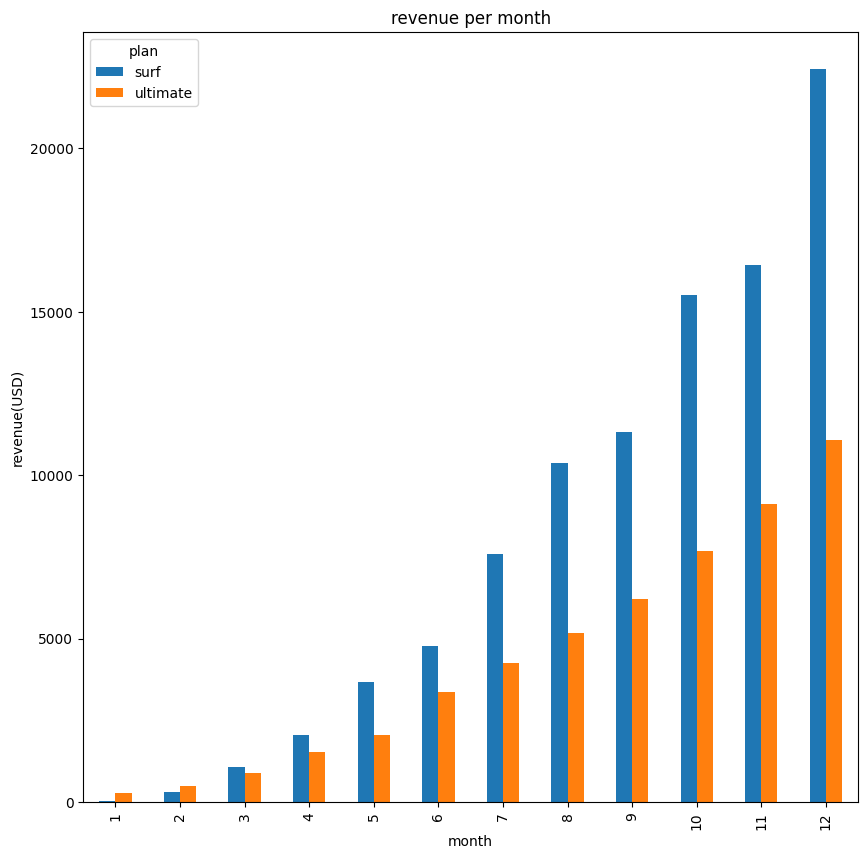

In [83]:
revenue_per_month.plot(kind="bar", title="revenue per month", ylabel="revenue(USD)", figsize=(10,10))
plt.show()

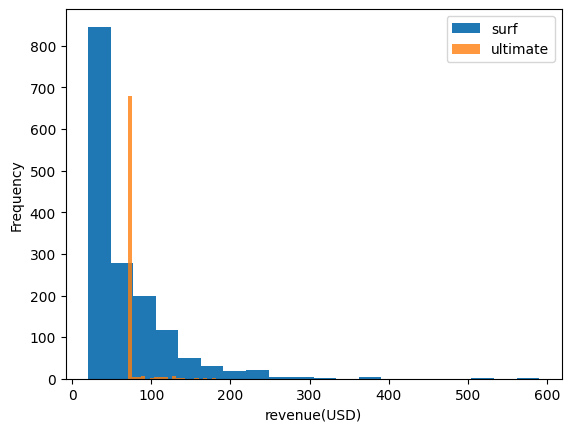

In [84]:
plans_calls[plans_calls["plan"]=="surf"]["revenue"].plot(kind="hist",bins=20)
plans_calls[plans_calls["plan"]=="ultimate"]["revenue"].plot(kind="hist",bins=20,alpha=0.8)
plt.xlabel("revenue(USD)")
plt.legend(["surf","ultimate"])
plt.show()

In [85]:
print(revenue_per_month.corr())

plan          surf  ultimate
plan                        
surf      1.000000  0.995508
ultimate  0.995508  1.000000


In [86]:
print("Total revenue surf plan in USD:",revenue_per_month["surf"].sum())
print("Total revenue ultimate plan in USD:",revenue_per_month["ultimate"].sum())

Total revenue surf plan in USD: 95491.18000000001
Total revenue ultimate plan in USD: 52066.0


[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

En este caso, los ingresos del plan Surf son mayores a los del plan Ultimate. Los ingresos son casi el doble si sumamos el ingreso que genera cada plan mensualmente. Los ingresos difieren dependiendo del plan. Curiosamente, los usuarios tienden a usar mas el plan Surf pero a largo plazo terminan pagando muchos mas dinero.

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

 <div class="alert alert-block alert-warning">
<b>Comentarios</b> <a class="tocSkip"></a>

Para estra pruebas se recomienda hacer una prueba de  Levene  para mostrar si las varianzas son iguales y agregarlo dentro de la función. Actualmente lo colocar como equal_var=False. Para esto, primero debes calcular las varianzas para cada uno de los planes y en un segundo tiempo debes de hacer uso de la siguiente función: 
    
    levene(surf_filtered['monthly_income'], ultimate_filtered['monthly_income'])
    
Adoptaremos un nivel de significancia de 0.05; si el valor p resultante es mayor a 0.05, aceptaremos la hipótesis nula, y si es menor a 0.05, aceptaremos la hipótesis alternativa, indicando que las varianzas no son iguales.    
</div>



In [87]:
# Prueba las hipótesis

# Hipotesis nula = Los ingresos premedios de los planes de llamandas son iguales
# Hipetesis alternativa = Los ingresos promedios de los planes de llamandas son diferentes

revenue_surf = plans_calls[plans_calls["plan"]=="surf"]["revenue"]
variance_surf = np.var(revenue_surf)
revenue_ultimate = plans_calls[plans_calls["plan"]=="ultimate"]["revenue"]
variance_ultimate = np.var(revenue_ultimate)
print(variance_surf)
print(variance_ultimate)


3065.8848438690247
129.66814043209877


In [88]:
alpha = 0.05 # nivel crítico de significación estadística

results = st.ttest_ind(revenue_ultimate, revenue_surf, equal_var=False)

print("valor p:", results.pvalue)

if results.pvalue < alpha:   # compara el valor p con la significación estadística
    print("Rechazamos la hipotesis nula")
else:
    print("No podemos rechazar la hipotesis nula")

valor p: 3.170390548113711e-15
Rechazamos la hipotesis nula


Nuestro analisis sugiere que el comportamiento de los usuarios difiere dependiendo del plan que se este usando. Parece que los usuarios del plan Surf tienden a gastar mas en comparacion con el plan Ultimate y por esta razon el ingreso promedio del plan Surf es mucho mayor en comparacion al plan Ultimate. El ingreso promedio depende del plan que el usuario tenga. Es mas conveniente hacer publicidad al plan Surf ya que este plan es el que mas ingresos proporciona por usuarios. 

[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [89]:
# Prueba las hipótesis

# Hipotesis nula = Los ingresos premedios del area NY-NJ y las otras regiones son iguales
# Hipetesis alternativa = Los ingresos promedios del area NY-NJ y las otras regiones son diferentes

print(plans_calls["city"].value_counts())
print()
print(plans_calls["city"].unique())

city
new york-newark-jersey city, ny-nj-pa msa          377
los angeles-long beach-anaheim, ca msa             132
chicago-naperville-elgin, il-in-wi msa              94
dallas-fort worth-arlington, tx msa                 88
philadelphia-camden-wilmington, pa-nj-de-md msa     82
                                                  ... 
omaha-council bluffs, ne-ia msa                      3
jacksonville, fl msa                                 2
el paso, tx msa                                      2
raleigh-cary, nc msa                                 2
cape coral-fort myers, fl msa                        1
Name: count, Length: 73, dtype: int64

['philadelphia-camden-wilmington, pa-nj-de-md msa'
 'charlotte-concord-gastonia, nc-sc msa'
 'louisville/jefferson county, ky-in msa'
 'los angeles-long beach-anaheim, ca msa'
 'san francisco-oakland-berkeley, ca msa' 'denver-aurora-lakewood, co msa'
 'new york-newark-jersey city, ny-nj-pa msa'
 'riverside-san bernardino-ontario, ca msa'
 'miami-for

In [90]:
NY_NJ_revenue = plans_calls[plans_calls["city"].isin(["new york-newark-jersey city, ny-nj-pa msa"])]["revenue"]
other_area_revenue = plans_calls[~(plans_calls["city"].isin(["new york-newark-jersey city, ny-nj-pa msa"]))]["revenue"]

variance_NY_NJ_revenue = np.var(NY_NJ_revenue)
variance_other_area_revenue = np.var(other_area_revenue)
print(variance_NY_NJ_revenue)
print(variance_other_area_revenue)


1890.5177172681153
2223.8866958162175


In [91]:
alpha = 0.05 # nivel crítico de significación estadística

results_city = st.ttest_ind(NY_NJ_revenue, other_area_revenue, equal_var=False)

print("valor p:", results_city.pvalue)

if results_city.pvalue < alpha:
    print("Rechazamos la hipotesis nula")
else:
    print("No podemos rechazar la hipotesis nula")

valor p: 0.03352561588530056
Rechazamos la hipotesis nula


En este caso podemos decir que el ingreso promedio del area NY-NJ varia y hay una diferencia significativa con respecto a los ingresos de las otras regiones. Aunque en este caso, la diferencia del ingreso promedio es mucho mas pequeña pero aun asi la diferencia sigue siendo significativa para nivel crítico de significación estadística 0.05

# Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

Podemos concluir que el plan y las tarifas de Surf es la que mas genera ingresos en comparacion al plan Ultimate. El plan Surf representa mas cantidad de minutos y trafico de internet por usuario lo que genera una cantidad considerable de ingreso por cada mes. Parece que los usuarios tienden a gastar la misma cantidad de minutos sin importar el plan pero hay mas cantidad de minutos por usuario en el plan Surf en comparacion al plan Ultimate, lo que indica que los usuarios prefieren usar el plan mas economico en la tarifas de minutos ya que terminan pagando menos por los mismos minutos, igualmente esto hace que se genere una cantidad considerable de ingresos especialmente en el consumo de internet. Si hablamos de compensar la diferencia podemos hacerle publicidad al plan Ultimate en mayor proporcion que el plan Surf. Debemos hacer un ajuste de inversion mayor en el plan de Ultimate para tener ingresos altos en ambos planes en caso de que sea posible y asi poder ajustar el presupuesto de publicidad. Tambien puede ser que es mas conveniente hacer publicidad al plan Surf ya que este plan es el que mas ingresos proporciona por usuarios.